# Student Performance Classification

We are given a dataset which contains insights into how different study habits, learning styles, and external factors influence student performance. It includes 10,000 records, covering details about students' study hours, online learning participation, exam scores, and other factors impacting academic success.

We will use this data to create a model that can predict a student's final grade.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [14]:
# Load the dataset:
df = pd.read_csv('data/student_performance_large_dataset.csv')
df.head()

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


In [15]:
# Examine the dataset
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  ob

,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,23.478800,27.130300,10.007900,74.922000,70.188900,75.085100,14.936500,6.979300
std,3.461986,13.002547,6.136726,14.675437,17.649447,14.749251,9.022639,1.996965
min,18.000000,5.000000,0.000000,50.000000,40.000000,50.000000,0.000000,4.000000
25%,20.000000,16.000000,5.000000,62.000000,55.000000,62.000000,7.000000,5.000000
50%,23.000000,27.000000,10.000000,75.000000,70.000000,75.000000,15.000000,7.000000
75%,27.000000,38.000000,15.000000,88.000000,85.000000,88.000000,23.000000,9.000000
max,29.000000,49.000000,20.000000,100.000000,100.000000,100.000000,30.000000,10.000000


In [16]:
# Drop useless columns:
df = df.drop(columns=['Student_ID'])

In [17]:
# Label encode the categorical features:
categorical_cols = df.select_dtypes(exclude=np.number).columns

df[categorical_cols] = df[categorical_cols].astype('category')
df = df.assign(**df[categorical_cols].apply(lambda x: x.cat.codes).add_suffix('_encoded'))
df.head()

,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,Gender_encoded,Preferred_Learning_Style_encoded,Participation_in_Discussions_encoded,Use_of_Educational_Tech_encoded,Self_Reported_Stress_Level_encoded,Final_Grade_encoded
0,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C,0,1,1,1,0,2
1,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D,0,2,0,1,2,3
2,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D,0,1,0,1,1,3
3,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B,0,0,1,1,1,1
4,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C,0,0,1,1,2,2


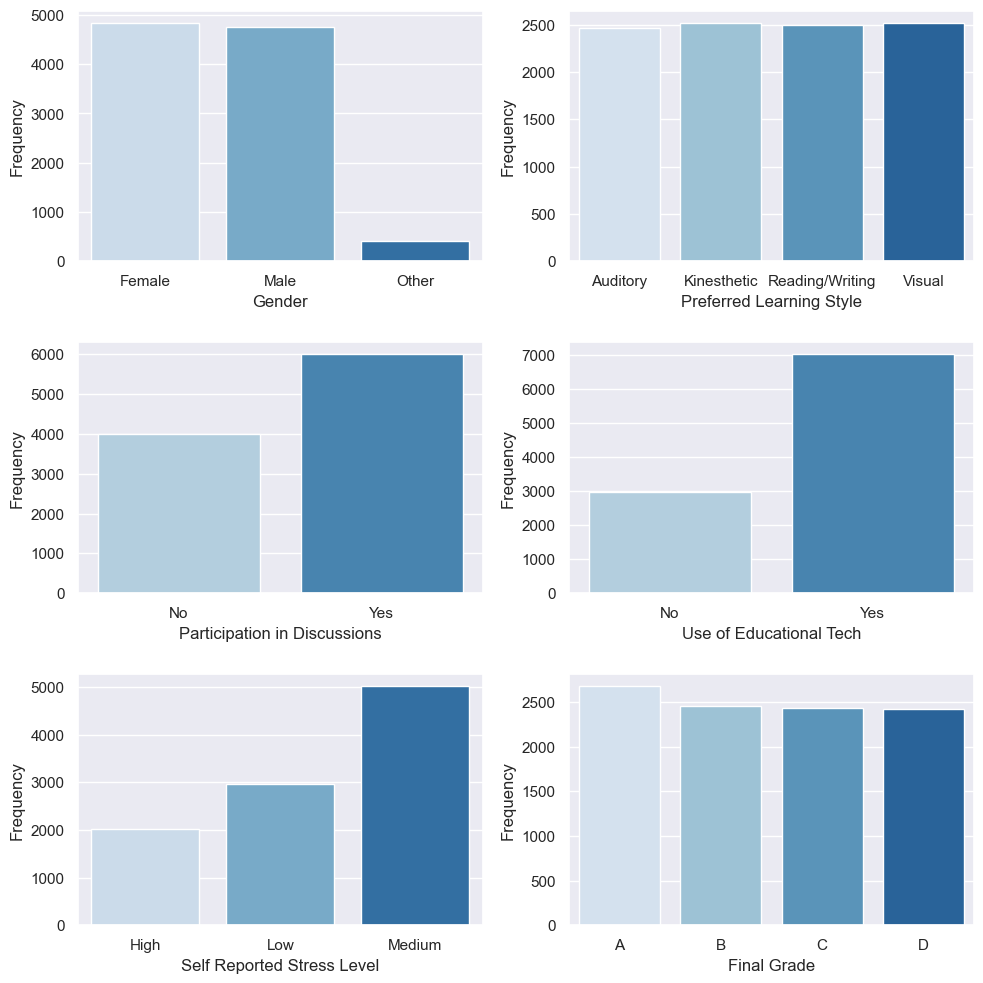

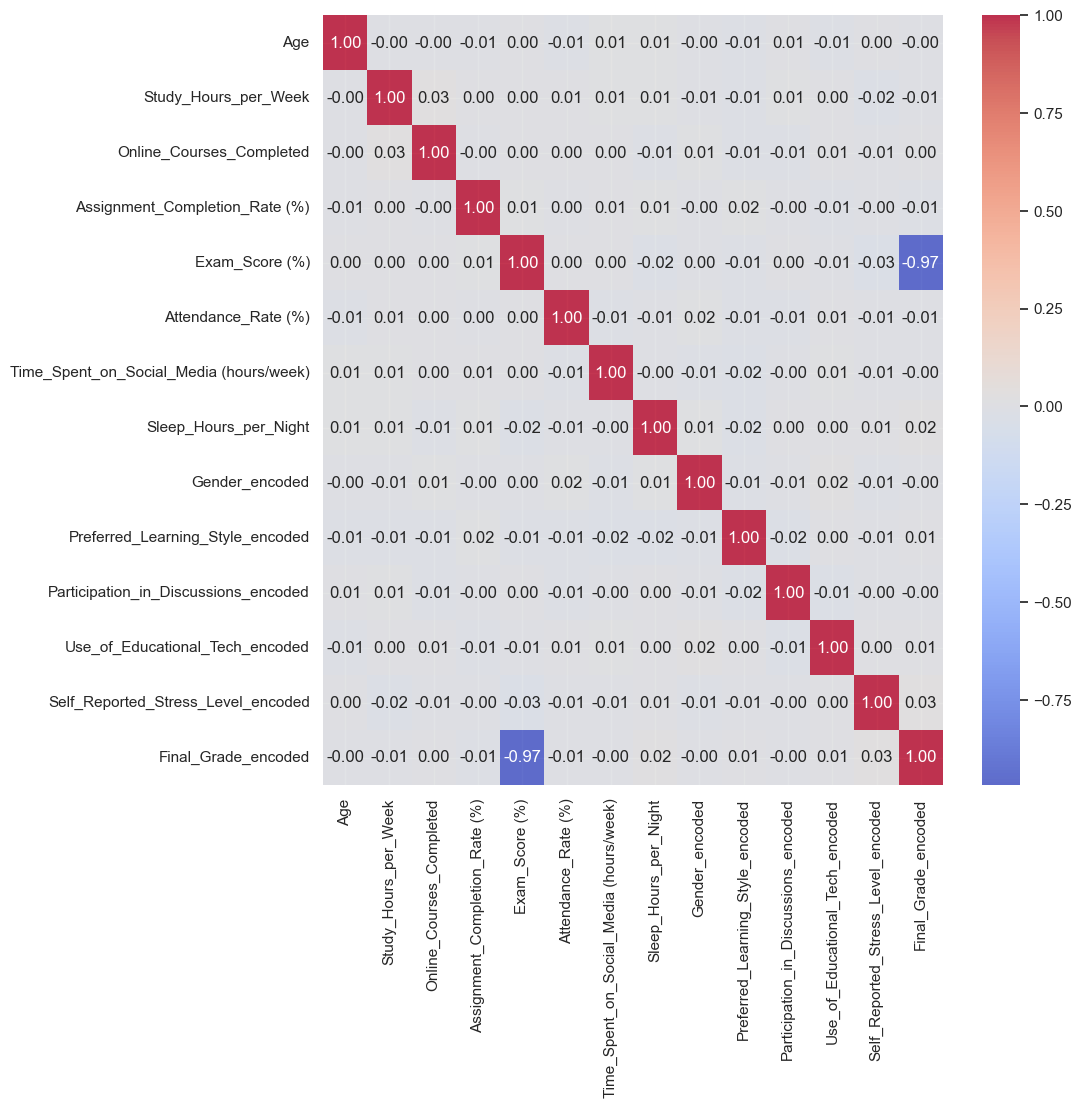

<Figure size 1000x1000 with 0 Axes>

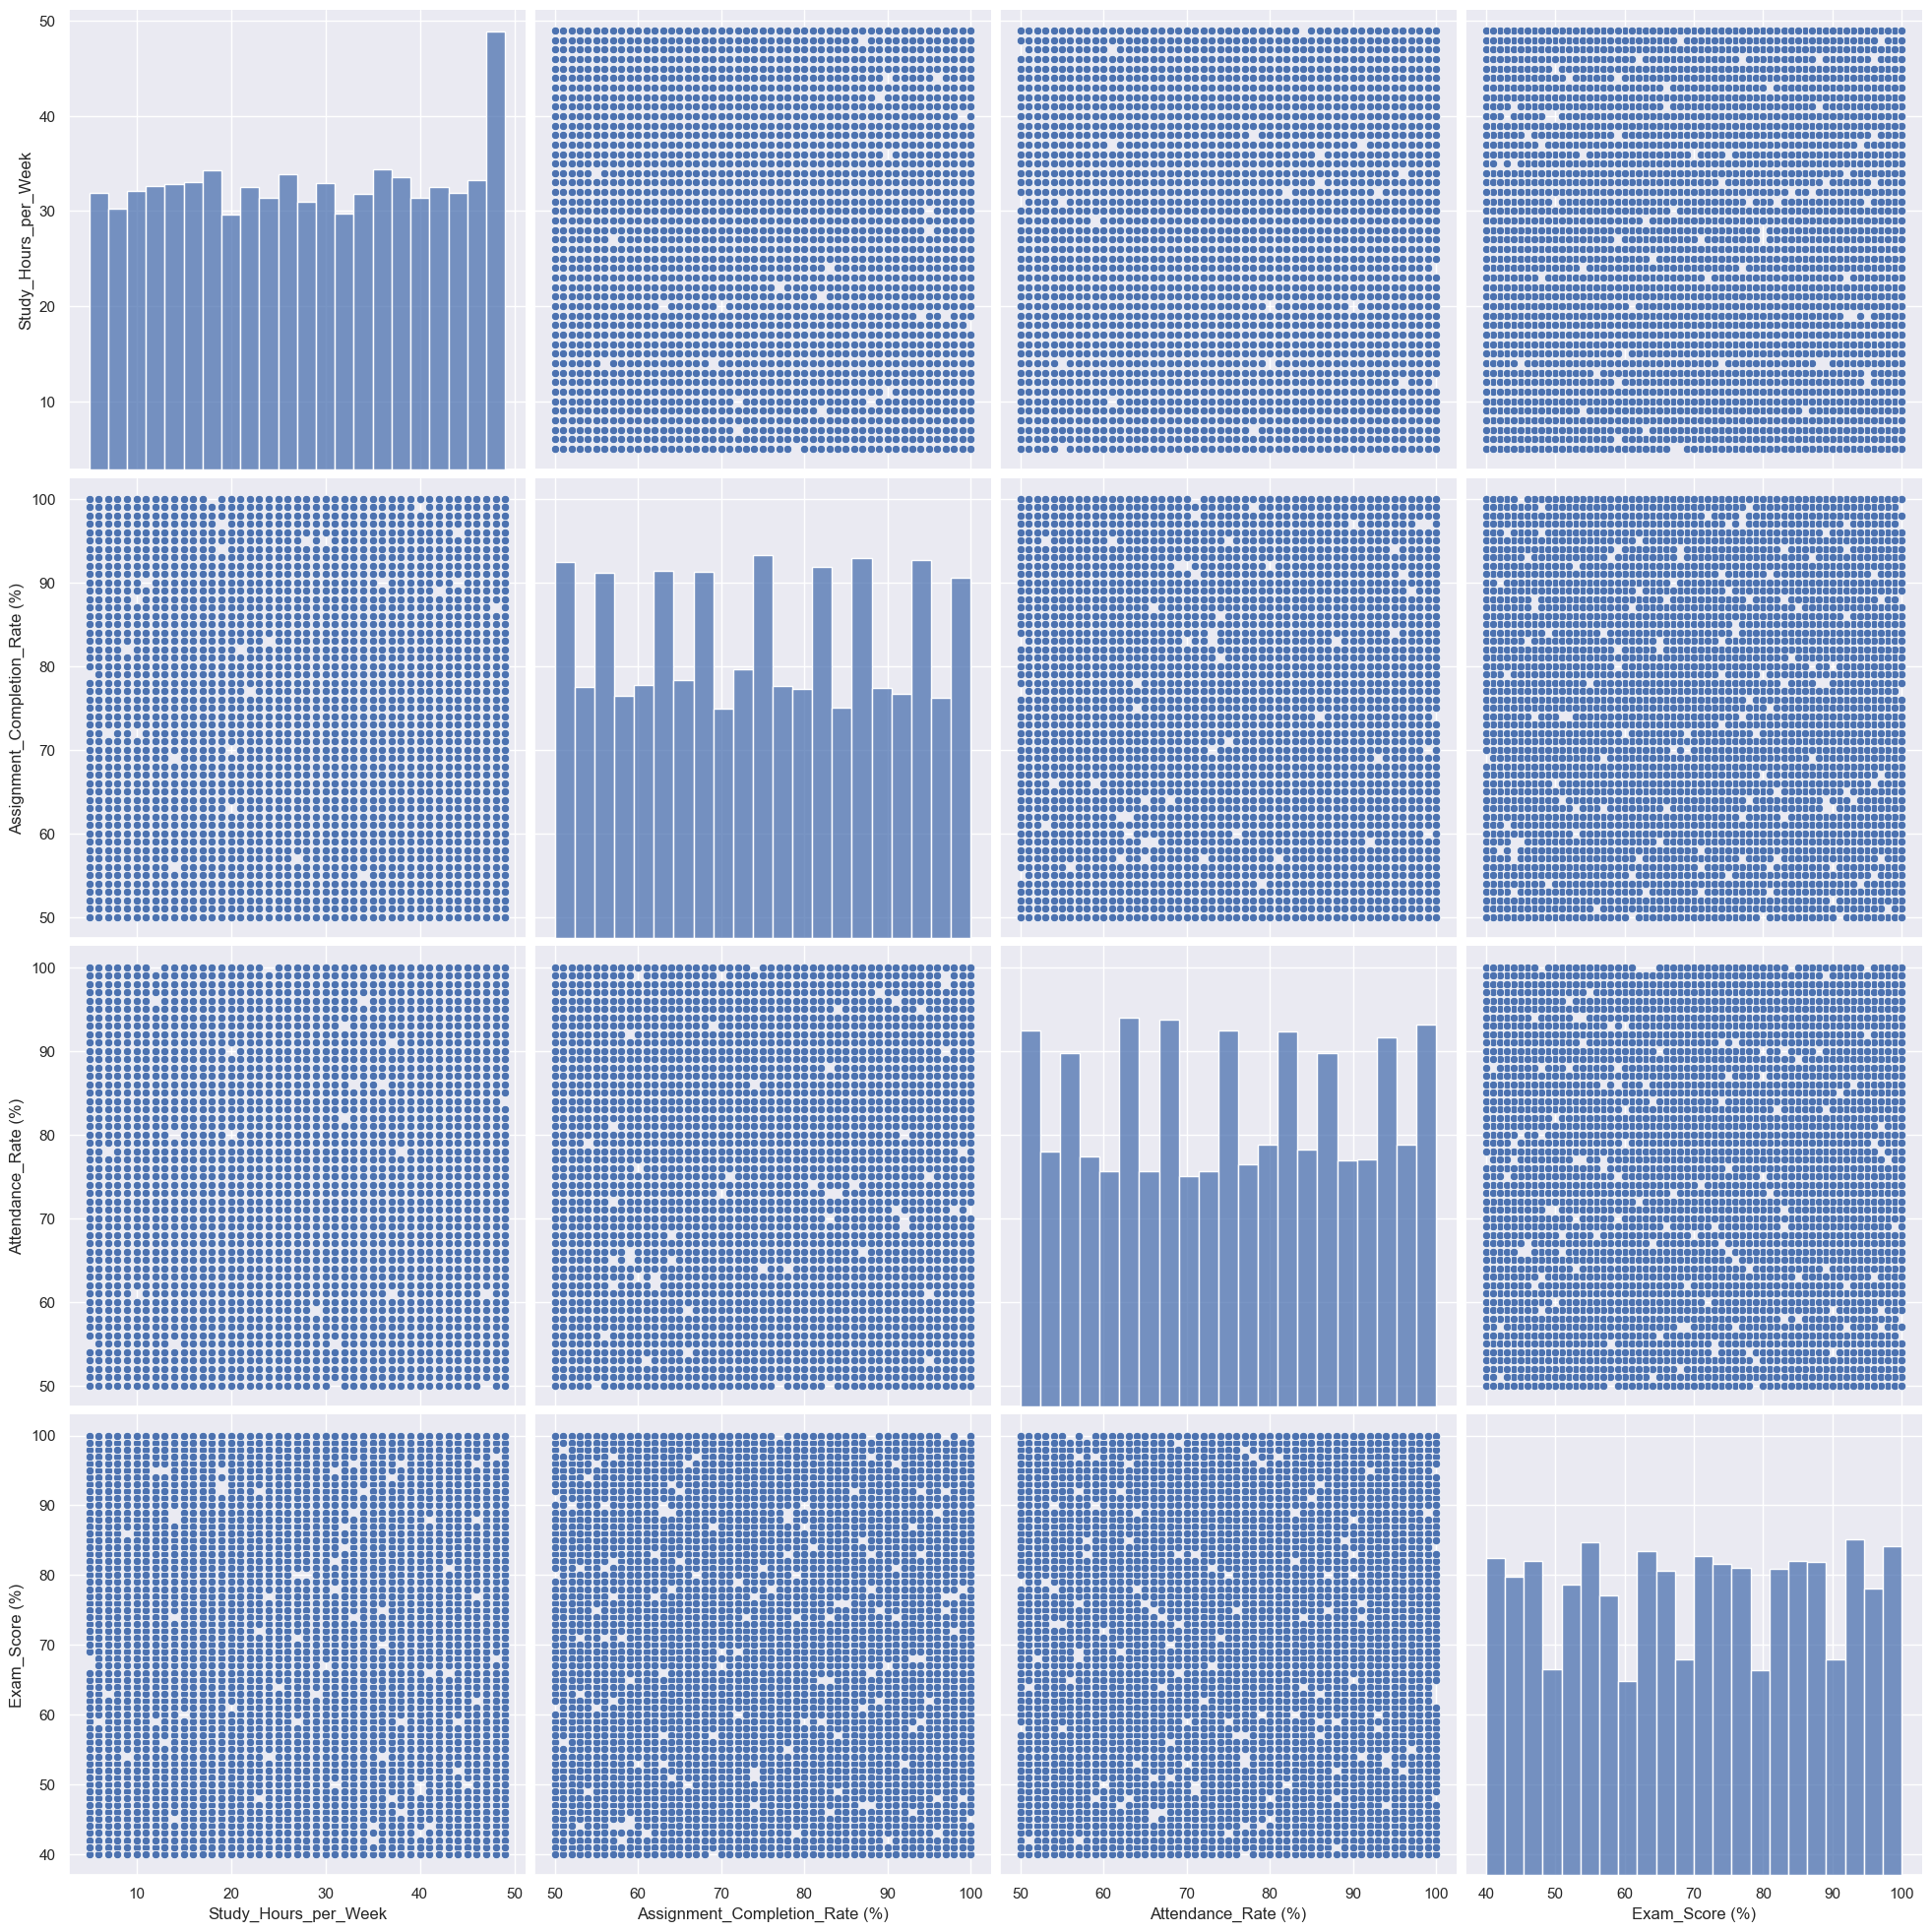

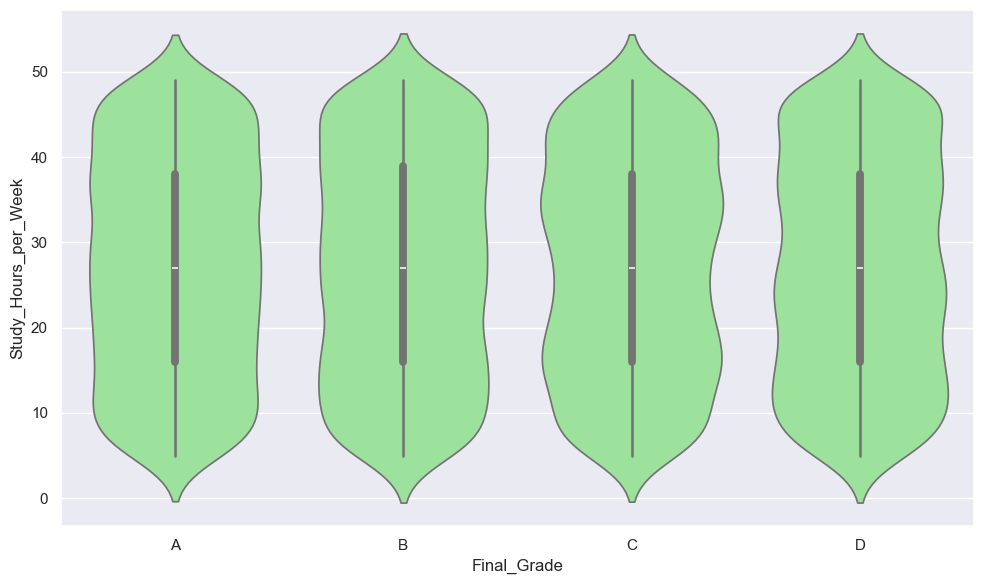

In [25]:
# Let's create some visualizations of data:

plt.figure(figsize=(10, 10))
rows = int(len(categorical_cols) / 2)
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, 2, i)
    ax = sns.countplot(df, x=col, hue=col, palette='Blues')
    ax.set(xlabel=col.replace('_', ' '), ylabel='Frequency')

plt.tight_layout(h_pad=2)
plt.show();


plt.figure(figsize=(10, 10))
sns.heatmap(df.drop(columns=categorical_cols).corr(), cmap='coolwarm', annot=True, fmt='.2f', alpha=0.8)
plt.show();


plt.figure(figsize=(10, 10))
sns.pairplot(df[['Study_Hours_per_Week', 'Assignment_Completion_Rate (%)', 'Attendance_Rate (%)', 'Exam_Score (%)']], height=5)
plt.show();

plt.figure(figsize=(10, 6))
sns.violinplot(df, x='Final_Grade', y='Study_Hours_per_Week', color="lightgreen")
plt.tight_layout()
plt.show();

In [20]:
# Let's train a RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

In [21]:
X, y = df.select_dtypes(include=np.number).drop('Final_Grade_encoded', axis=1), df['Final_Grade_encoded']

estimator = Pipeline([
    ('slr', RobustScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['sqrt', None],
    'clf__max_depth': [10, 20, 30, None],
    'clf__class_weight': ['balanced', None]
}

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

estimator = RandomizedSearchCV(
    estimator,
    param_grid,
    cv=5,
    scoring=['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted'],
    refit='f1_weighted',
    n_iter=10,
)

estimator.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('slr', RobustScaler()),
                                             ('clf',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'clf__class_weight': ['balanced', None],
                                        'clf__max_depth': [10, 20, 30, None],
                                        'clf__max_features': ['sqrt', None],
                                        'clf__min_samples_leaf': [1, 2, 4],
                                        'clf__min_samples_split': [2, 5, 10],
                                        'clf__n_estimators': [100, 200, 300]},
                   refit='f1_weighted',
                   scoring=['accuracy', 'f1_weighted', 'precision_weighted',
                            'recall_weighted'])

In [22]:
best_estimator = estimator.best_estimator_
estimator.best_params_

{'clf__n_estimators': 300,
 'clf__min_samples_split': 10,
 'clf__min_samples_leaf': 2,
 'clf__max_features': 'sqrt',
 'clf__max_depth': 20,
 'clf__class_weight': None}

In [23]:
y_pred = best_estimator.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       536
           1       1.00      1.00      1.00       491
           2       1.00      1.00      1.00       488
           3       1.00      1.00      1.00       485

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



<Axes: >

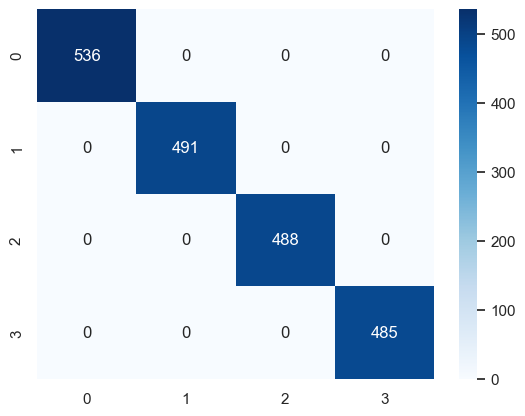

In [24]:
# Our model is getting 100
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='Blues', annot=True, fmt='d')

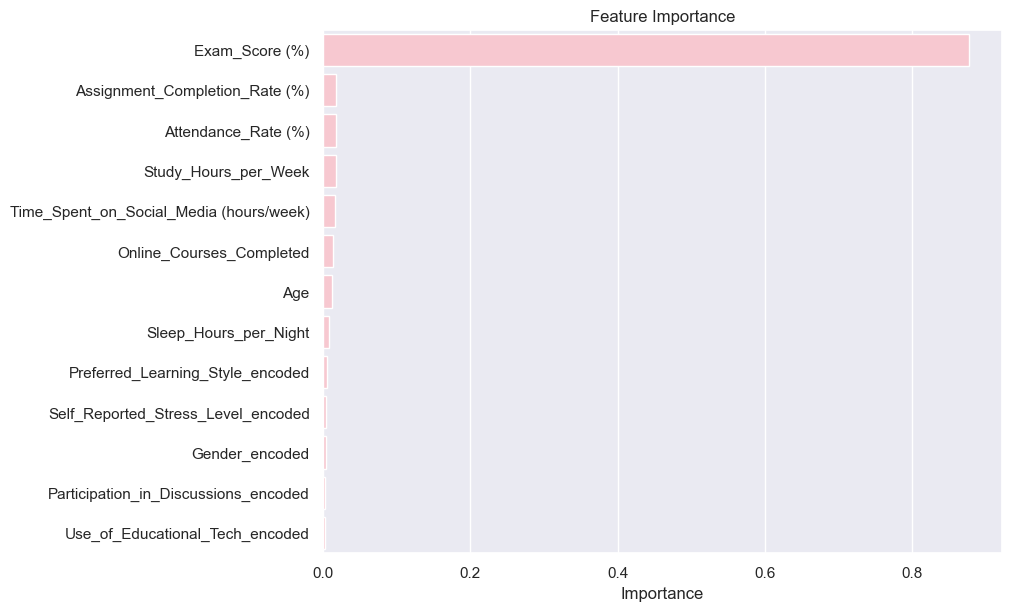

In [47]:
importance = best_estimator.named_steps['clf'].feature_importances_
feature_importance = pd.Series(importance, index=X.columns)

plt.figure(figsize=(10, 6), layout='constrained')
sns.barplot(feature_importance.sort_values(ascending=False), orient='h', color='pink')
plt.title('Feature Importance')
plt.gca().set(xlabel='Importance')
plt.show();